<a href="https://colab.research.google.com/github/contractorwolf/coronavirus-mask-detection/blob/master/Public_Tensorflow_MaskDetection_with_TFLite_on_Raspberry_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Colab is for training a Tensorflow Model used to detect the usage of facemasks.  The model is trained with hundreds of labeled images of faces both with and without facemasks.  The model is fully trained in Google Colab on  Tensorflow 1.13 and then converted to a TFLite model to be used on the Raspberry Pi.  Since the Raspberry Pi is a low powered machine the model is also converted to an EdgeTPU model so that it can take advantage of the Google Coral TPU USB module for a much faster inference FPS rate.  Here is an example of the model trained and converted using this Colab running on a Raspberry Pi with the Coral TPU:  
https://www.youtube.com/watch?v=34NSZA2Ne5A

The Colab here could be easily converted to training any other type of visual detector using the same basic functions but with a different set of labeled images and just changes to the config file and label map files in the training folder.  

Feel free to send me questions or comments on **Twitter** (https://twitter.com/contractorwolf) or **Github** (@https://github.com/contractorwolf) 


# Install the version of Tensorflow for this model

This model uses Tensorflow GPU v1.13 and you will have to carefully go through all of the steps listed below before you attempt to start training.  These steps setup tensorflow, get the images, set the data for training and get in the right folders for running the training process.  Look at the descriptions to better understand each step and run them in order.

In [ ]:
# Uninstall current tensorflow, make sure that you confirm at this step, because it will ask if you are sure
!pip uninstall tensorflow

# Install Tensorflow-GPU v1.13
!pip install tensorflow-gpu==1.13.2

# check python version, should be Python 3.6.9
!python --version

# Verify installed Tensorflow
import tensorflow as tf
print(tf.__version__)

# show current directory
!pwd

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 345.0MB 24kB/s 
     |████████████████████████████████| 368kB 48.8MB/s 
     |████████████████████████████████| 3.2MB 51.8MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
Python 3.6

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.2
/content


Next download the model archive that contains the object detection model example.  We need to specifically use the version 1.13 to match the version of Tensorflow that we just installed

In [ ]:
# Get Tensorflow from GitHub and unzip it
!cd /content
!mkdir tensorflow1
!cd /content/tensorflow1
!wget https://github.com/tensorflow/models/archive/r1.13.0.zip
!unzip -q ./r1.13.0.zip
!mv models-r1.13.0/ tensorflow1/models/
!rm r1.13.0.zip

--2020-08-14 04:55:46--  https://github.com/tensorflow/models/archive/r1.13.0.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/tensorflow/models/zip/r1.13.0 [following]
--2020-08-14 04:55:46--  https://codeload.github.com/tensorflow/models/zip/r1.13.0
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘r1.13.0.zip’

r1.13.0.zip             [ <=>                ] 420.44M  15.7MB/s    in 33s     

2020-08-14 04:56:19 (12.9 MB/s) - ‘r1.13.0.zip’ saved [440860285]



Build and install the Libraries needed to run the example object_detection code

In [ ]:
# Build and Install Tensorflow
!python /content/tensorflow1/models/research/setup.py build
!python /content/tensorflow1/models/research/setup.py install

running build
running install
running bdist_egg
running egg_info
creating object_detection.egg-info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/e

Change to the /research folder and build the protos for later use.




In [ ]:
# Go into research/ DIR of Tensorflow
%cd /content/tensorflow1/models/research/

# Build protos!
!protoc object_detection/protos/*.proto --python_out=.

/content/tensorflow1/models/research


Set the PYTHONPATH environmental variable

In [ ]:
# Set PYTHONPATH
%set_env PYTHONPATH=/content/tensorflow1/models:/content/tensorflow1/models/research:/content/tensorflow1/models/research/slim:/content/tensorflow1/models:/content/tensorflow1/models/research/object_detection

env: PYTHONPATH=/content/tensorflow1/models:/content/tensorflow1/models/research:/content/tensorflow1/models/research/slim:/content/tensorflow1/models:/content/tensorflow1/models/research/object_detection


Move to the object_detection folder, where you will do most of the remaining work

In [ ]:
# Go into object_detection/ DIR of Tensorflow
%cd object_detection

/content/tensorflow1/models/research/object_detection


Download the pretrained Quantized MobileNet V2 Coco model.  You will need the quantized model so that it can run using the Google Coral USB modelue for faster calculation on the Raspberry Pi.  We will continue to train this model but on just images with and without masks.

In [ ]:
# Now get SSD mobilenet model from GitHub
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
!tar -xf ./ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
!rm ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz

--2020-08-14 04:56:30--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144806142 (138M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’

ssd_mobilenet_v2_qu 100%[===================>] 138.10M  92.2MB/s    in 1.5s    

2020-08-14 04:56:32 (92.2 MB/s) - ‘ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03.tar.gz’ saved [144806142/144806142]



Next you will need to clone the code from my github that is specifically setup for training a model to identinfy is someone is wearing a COVID mask.  This repo contains:

*   images in a test.zip folder and a train.zip
*   corresponding xml files that are the labels for the test and train images
*   image processing python scripts for processing xml image labels into test/record and train/record files used in training (imageprocessing.zip)
*   label map file (mask_label_map.pbtxt for training)
*   quantized coco config file (ssd_mobilenet_v2_quantized_300x300_coco.config used in training) 

You will download and unzip these in the next few steps.  The steps will unpack them into the folders they will need to be in for testing. 



In [ ]:
! git clone https://github.com/contractorwolf/coronavirus-mask-detection

Cloning into 'coronavirus-mask-detection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 19 (delta 0), reused 3 (delta 0), pack-reused 13
Unpacking objects: 100% (19/19), done.


> **SIDENOTE: If you are doing a custom detector and not using my images:**  
> To make the XML label files yourself (**not required for this colab since I have already labeled the images**) will need to use this application linked below and go through each image in both your test and train folder marking boxes and labeling the things you want to identify:  
> https://github.com/tzutalin/labelImg (**github**)  
> https://www.dropbox.com/s/tq7zfrcwl44vxan/windows_v1.6.0.zip?dl=1 (**direct download**)  
> For mine I downloaded 1000 images of faces and using the application linked below to mark each face as haveing a mask or not having a mask and labeled the boxes accordingly.  It is easy to do but tedious.

Create the folder to hold the test and training images

In [ ]:
!mkdir images

Copy the train.zip file into the /images directory, unzip the file and then delete the zip file

In [ ]:
!cp coronavirus-mask-detection/images/train.zip images/
!unzip images/train.zip -d images
!rm images/train.zip

Archive:  images/train.zip
  inflating: images/train/02eysg1vm9mnkq75s1viv0b.jpg  
  inflating: images/train/02eysg1vm9mnkq75s1viv0b.xml  
  inflating: images/train/02u21tq3opa46c4dy1bwmv4.jpg  
  inflating: images/train/02u21tq3opa46c4dy1bwmv4.xml  
  inflating: images/train/05xe2s46rvilfpoqjb2kn27.jpg  
  inflating: images/train/05xe2s46rvilfpoqjb2kn27.xml  
  inflating: images/train/0825vz9x5oz6rqordb214db.jpg  
  inflating: images/train/0825vz9x5oz6rqordb214db.xml  
  inflating: images/train/08cbf06xiy0ge2ie83mema6.jpg  
  inflating: images/train/08cbf06xiy0ge2ie83mema6.xml  
  inflating: images/train/08floqat5nw7hgj4mflqn79.jpg  
  inflating: images/train/08floqat5nw7hgj4mflqn79.xml  
  inflating: images/train/0b375va16pheix2zc2wh0v.jpg  
  inflating: images/train/0b375va16pheix2zc2wh0v.xml  
  inflating: images/train/0bk6v5h1pwxkuecfz0cghq.jpg  
  inflating: images/train/0bk6v5h1pwxkuecfz0cghq.xml  
  inflating: images/train/0dor0770xredhls83alpods.jpg  
  inflating: images/train

Copy the test.zip file into the /images directory, unzip the file and then delete the zip file

In [ ]:
!cp coronavirus-mask-detection/images/test.zip images/
!unzip images/test.zip -d images
!rm images/test.zip

Archive:  images/test.zip
  inflating: images/test/sl7164g017puvjczm2uoj.jpg  
  inflating: images/test/sl7164g017puvjczm2uoj.xml  
  inflating: images/test/so9dny6gcy3xey7kk2ywp.jpg  
  inflating: images/test/so9dny6gcy3xey7kk2ywp.xml  
  inflating: images/test/sos89pygobhve2bsb59ho.jpg  
  inflating: images/test/sos89pygobhve2bsb59ho.xml  
  inflating: images/test/sqketmnu3bbf1u1233j5c4.jpg  
  inflating: images/test/sqketmnu3bbf1u1233j5c4.xml  
  inflating: images/test/ssq3vl1me8bx1go1iw7uv.jpg  
  inflating: images/test/ssq3vl1me8bx1go1iw7uv.xml  
  inflating: images/test/sueu6y1oq71iyfqst3645.jpg  
  inflating: images/test/sueu6y1oq71iyfqst3645.xml  
  inflating: images/test/swq5rxpwppj8zr6gpbbu.jpg  
  inflating: images/test/swq5rxpwppj8zr6gpbbu.xml  
  inflating: images/test/szb8ciq2jfd1yeqgn1hqo2.jpg  
  inflating: images/test/szb8ciq2jfd1yeqgn1hqo2.xml  
  inflating: images/test/t4y821xe2dppgowiinmhj.jpg  
  inflating: images/test/t4y821xe2dppgowiinmhj.xml  
  inflating: image

Next step is to copy the images that will be used when actually running the model after training has completed.  These are images that are used to show that the model works right here in Google Colab in the "**Use Mask Detector**" steps after training and model conversion is done

In [ ]:
!cp coronavirus-mask-detection/images/test_images.zip .
!unzip test_images.zip
!rm test_images.zip

Archive:  test_images.zip
  inflating: test_images/africanamericans.jpg  
  inflating: test_images/beautifulblackwomeninmasks.jpg  
  inflating: test_images/blackfaces.jpg  
  inflating: test_images/blkman.jpg  
  inflating: test_images/darkmask.jpg  
  inflating: test_images/healthcare.jpg  
  inflating: test_images/mask fail.jpg  
  inflating: test_images/maskedblackfaces.jpg  
  inflating: test_images/mixed.jpg   
  inflating: test_images/mixedmasks.jpg  
  inflating: test_images/nomask.jpg  
  inflating: test_images/onstreet.jpg  
  inflating: test_images/pence.jpg   
  inflating: test_images/students.jpg  
  inflating: test_images/weirdmask.jpg  
  inflating: test_images/weirdmask2.jpg  


Copy the imageprocessing.zip file into the /object_detection directory, unzip the file and then delete the zip file.  Thes files convert the xml labels to 
Tensorflow .record files to be used in training.

In [ ]:
!cp coronavirus-mask-detection/images/imageprocessing.zip .
!unzip imageprocessing.zip
!rm imageprocessing.zip

Archive:  imageprocessing.zip
  inflating: generate_tfrecord.py    
  inflating: xml_to_csv.py           


Copy the training.zip file into the /object_detection directory, unzip the file and then delete the zip file.  These are the config file for training and the label map for training and testing. 

In [ ]:
!cp coronavirus-mask-detection/training.zip .
!unzip training.zip
!rm training.zip


Archive:  training.zip
replace training/mask_label_map.pbtxt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training/mask_label_map.pbtxt  
  inflating: training/ssd_mobilenet_v2_quantized_300x300_coco.config  


Convert the XML files that are the labels for each of the images into a CSV version of the files to be used in the next step.

In [ ]:
# Convert XMLs to CSVs
!python xml_to_csv.py

Successfully converted xml to csv.
Successfully converted xml to csv.


Convert the CSV verison of the labels into the train.record and test.record files to be used by the training of the model.

In [ ]:
# Create TFRecords for both training and testing
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=training/train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=training/test.record

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Copy the tensoflow train.py example from the legacy folder into the main object detection_folder.  This is the file that will handle the training process.

In [ ]:
#copy the tensoflow train.py exmaple from the legacy folder into the main object detection_folder
!cp /content/tensorflow1/models/research/object_detection/legacy/train.py /content/tensorflow1/models/research/object_detection/

# Run the Training

In [ ]:
# verify that the files indicated in the config file are where you say (test.record and train.record especially)
# Run the training!!!
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=/content/tensorflow1/models/research/object_detection/training/ssd_mobilenet_v2_quantized_300x300_coco.config

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 8391: loss = 1.3572 (4.357 sec/step)
INFO:tensorflow:global step 8392: loss = 2.5275 (4.420 sec/step)
INFO:tensorflow:global step 8393: loss = 1.3873 (4.325 sec/step)
INFO:tensorflow:global step 8394: loss = 1.3354 (4.312 sec/step)
INFO:tensorflow:global step 8395: loss = 1.5185 (4.310 sec/step)
INFO:tensorflow:global step 8396: loss = 0.9082 (4.309 sec/step)
INFO:tensorflow:global step 8397: loss = 1.5052 (4.404 sec/step)
INFO:tensorflow:global step 8398: loss = 0.9245 (4.310 sec/step)
INFO:tensorflow:global step 8399: loss = 1.2072 (4.340 sec/step)
INFO:tensorflow:global step 8400: loss = 1.2847 (4.375 sec/step)
INFO:tensorflow:global step 8401: loss = 1.4791 (4.351 sec/step)
INFO:tensorflow:global step 8402: loss = 1.1386 (4.288 sec/step)
INFO:tensorflow:global step 8403: loss = 1.3336 (4.318 sec/step)
INFO:tensorflow:global step 8404: loss = 1.0132 (4.283 sec/step)
INFO:tensorflow:global step 8405: loss 

After training is complete you will need to know the number from the latest checkpoint for the next few steps. The number you are looking for looks like this from the files in the training folder: model.ckpt-**13144**.index

find yours by running the command below and copy it for the next few steps

In [ ]:
ls -al training

total 898276
drwxr-xr-x  2 root root      4096 Aug 14 21:28 ./
drwxr-xr-x 29 root root      4096 Aug 14 04:57 ../
-rw-r--r--  1 root root       277 Aug 14 21:28 checkpoint
-rw-r--r--  1 root root 302399553 Aug 14 21:28 events.out.tfevents.1597381096.14ac5188a6d1
-rw-r--r--  1 root root  36633019 Aug 14 04:58 graph.pbtxt
-rw-r--r--  1 root root        66 Aug 14 04:56 mask_label_map.pbtxt
-rw-r--r--  1 root root  74190704 Aug 14 20:48 model.ckpt-12608.data-00000-of-00001
-rw-r--r--  1 root root     68642 Aug 14 20:48 model.ckpt-12608.index
-rw-r--r--  1 root root  19833874 Aug 14 20:48 model.ckpt-12608.meta
-rw-r--r--  1 root root  74190704 Aug 14 20:58 model.ckpt-12744.data-00000-of-00001
-rw-r--r--  1 root root     68642 Aug 14 20:58 model.ckpt-12744.index
-rw-r--r--  1 root root  19833874 Aug 14 20:58 model.ckpt-12744.meta
-rw-r--r--  1 root root  74190704 Aug 14 21:08 model.ckpt-12881.data-00000-of-00001
-rw-r--r--  1 root root     68642 Aug 14 21:08 model.ckpt-12881.index
-rw-r--r--

OPTIONAL: zip the training folder and download it in case you want to restart traing at another time

In [ ]:
### OPTIONAL, if you want to continue training sometimes later ###
# Zip the training folder and download locally, so we can continue in another session if required
!zip -r 'training081420.zip' ./training

  adding: training/ (stored 0%)
  adding: training/pipeline.config (deflated 67%)
  adding: training/model.ckpt-13017.data-00000-of-00001 (deflated 7%)
  adding: training/train.record (deflated 1%)
  adding: training/model.ckpt-12744.data-00000-of-00001 (deflated 7%)
  adding: training/model.ckpt-12881.index (deflated 73%)
  adding: training/model.ckpt-13144.data-00000-of-00001 (deflated 7%)
  adding: training/model.ckpt-12744.index (deflated 73%)
  adding: training/model.ckpt-12608.data-00000-of-00001 (deflated 7%)
  adding: training/model.ckpt-12881.meta (deflated 94%)
  adding: training/model.ckpt-13144.index (deflated 73%)
  adding: training/checkpoint (deflated 73%)
  adding: training/model.ckpt-13144.meta (deflated 94%)
  adding: training/model.ckpt-12608.meta (deflated 94%)
  adding: training/model.ckpt-13017.index (deflated 73%)
  adding: training/model.ckpt-12881.data-00000-of-00001 (deflated 7%)
  adding: training/test.record (deflated 1%)
  adding: training/events.out.tfeven

-----------------------------------------------------------------------------------

# CREATE frozen_inference_graph.pb

A frozen inference graph can be used on a wide variety of machines and after you create one you can use the next steps to test it here in Colab against the test images or you can upload your own to the /test_images folder if you want.  You will need the number of the latest training checkpoint in this command so be sure you have found it in the preceding steps.  Look for the latest step number in the training folder and replace the number here in the parameters with the step number from your folder:   
--trained_checkpoint_prefix training/model.ckpt-**13144**

In [ ]:
!mkdir inference_graph
# export .pd file for windows
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path=/content/tensorflow1/models/research/object_detection/training/ssd_mobilenet_v2_quantized_300x300_coco.config --trained_checkpoint_prefix training/model.ckpt-13144 --output_directory inference_graph

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
# frozen_inference_graph.pb
### OPTIONAL ###
# Zip the inference_graph folder, and backup to GDrive, so we can use it for normal predictions on windows
!zip -r 'inference_graph081420.zip' ./inference_graph

  adding: inference_graph/ (stored 0%)
  adding: inference_graph/pipeline.config (deflated 70%)
  adding: inference_graph/model.ckpt.index (deflated 67%)
  adding: inference_graph/model.ckpt.data-00000-of-00001 (deflated 7%)
  adding: inference_graph/model.ckpt.meta (deflated 94%)
  adding: inference_graph/checkpoint (deflated 42%)
  adding: inference_graph/saved_model/ (stored 0%)
  adding: inference_graph/saved_model/saved_model.pb (deflated 11%)
  adding: inference_graph/saved_model/variables/ (stored 0%)
  adding: inference_graph/frozen_inference_graph.pb (deflated 10%)




---



# USE MASK DETECTOR frozen_inference_graph.pb to visually verify the model works

Move to the /research folder to run the code below and use the frozen inference graph created in the steps above.  This .pb file can be used on many different types of machines including linux, mac and windows.  This is the file I used to create this tesing video running on my windows 10 machine:
https://www.youtube.com/watch?v=5pvIn8i-R9E


In [ ]:
#!pwd
%cd /content/tensorflow1/models/research


/content/tensorflow1/models/research


Next set the code to use the frozen_inference_graph.pb created in the steps above and to use the label map used in training the model.

In [ ]:
# run from /content/tensorflow1/models/research

from utils import label_map_util

from utils import visualization_utils as vis_util


# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = 'object_detection/inference_graph/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'object_detection/training/mask_label_map.pbtxt'


print(PATH_TO_FROZEN_GRAPH)
print(PATH_TO_LABELS)


object_detection/inference_graph/frozen_inference_graph.pb
object_detection/training/mask_label_map.pbtxt


Below is some boiler plate code to setup the Colab to run the inference on local images.  You will not need to do any edits to this or the next step, just make sure to run them.

In [ ]:
# Load a (frozen) Tensorflow model into memory.
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loading label map
# Label maps map indices to category names, so that when our convolution network predicts 5, we know that this corresponds to airplane. Here we use internal utility functions, 
# but anything that returns a dictionary mapping integers to appropriate string labels would be fine
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

# helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session(config=config) as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

The next block is the code used to draw the color coded boxes around the faces that are identified in the images, you will not need to make any edis here, just run it and move on to the next step.

In [ ]:
import collections
import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements
import matplotlib.pyplot as plt  # pylint: disable=g-import-not-at-top
import numpy as np
import PIL.Image as Image
import PIL.ImageColor as ImageColor
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
import six
import tensorflow as tf
import numpy as np

def draw_bounding_box_on_image_array(image, ymin, xmin, ymax, xmax, color='red', thickness=4, display_str_list=()):
  image_pil = Image.fromarray(np.uint8(image)).convert('RGB')
  draw_bounding_box_on_image(image_pil, ymin, xmin, ymax, xmax, color, thickness, display_str_list)
  np.copyto(image, np.array(image_pil))

def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color='red', thickness=4, display_str_list=()):
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)
  try:
    font = ImageFont.truetype('arial.ttf', 24)
  except IOError:
    font = ImageFont.load_default()

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin), (left + text_width, text_bottom)], fill=color)
    draw.text((left + margin, text_bottom - text_height - margin), display_str, fill='black', font=font)
    text_bottom -= text_height - 2 * margin

def visualize_boxes_and_labels_on_image_array(image, boxes, classes, scores, category_index, instance_masks=None,
    max_boxes_to_draw=20, min_score_thresh=.5, line_thickness=4, groundtruth_box_visualization_color='black'):
  
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  box_to_display_str_map = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_instance_boundaries_map = {}
  box_to_keypoints_map = collections.defaultdict(list)

  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if scores is None:
        box_to_color_map[box] = groundtruth_box_visualization_color
      else:
        display_str = ''

        if classes[i] in category_index.keys():
          class_name = category_index[classes[i]]['name']
        else:
          class_name = 'N/A'
        display_str = '{}: {}%'.format(display_str, int(100*scores[i]))
        box_to_display_str_map[box].append(display_str)

        box_to_color_map[box] = assigned_color_by_class(classes[i])
        print('scores:', scores[i], ' class: ', category_index[classes[i]]['name'])

  # Draw all boxes onto image.
  for box, color in box_to_color_map.items():
    ymin, xmin, ymax, xmax = box
    draw_bounding_box_on_image_array(image, ymin, xmin, ymax, xmax, color=color, thickness=line_thickness, display_str_list=box_to_display_str_map[box])
  return image

def assigned_color_by_class(class_number):
  if class_number == 1: # nomask
    color_name = 'Red' # shows as Red
  elif class_number == 2: #mask
    color_name = 'Chartreuse'  #shows as green
  else:
    color_name = STANDARD_COLORS[class_number % len(STANDARD_COLORS)]

  return color_name


The following code will load images to have the model run against.  If you want to add images to be tested simply place new images in the /test_images folder and add the path to the image into the array below.  These images are loaded and placed in one of the steps above.

In [ ]:

IMAGE_SIZE = (12, 8)
TEST_IMAGE_PATHS = [
  '/content/tensorflow1/models/research/object_detection/test_images/mixed.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/pence.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/students.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/nomask.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/weirdmask.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/weirdmask2.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/blackfaces.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/onstreet.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/blkman.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/africanamericans.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/mixedmasks.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/maskfail.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/darkmask.jpg'
  ,'/content/tensorflow1/models/research/object_detection/test_images/beautifulblackwomeninmasks.jpg'
]

print(TEST_IMAGE_PATHS)
!pwd

['/content/tensorflow1/models/research/object_detection/test_images/mixed.jpg', '/content/tensorflow1/models/research/object_detection/test_images/pence.jpg', '/content/tensorflow1/models/research/object_detection/test_images/students.jpg', '/content/tensorflow1/models/research/object_detection/test_images/nomask.jpg', '/content/tensorflow1/models/research/object_detection/test_images/weirdmask.jpg', '/content/tensorflow1/models/research/object_detection/test_images/weirdmask2.jpg', '/content/tensorflow1/models/research/object_detection/test_images/blackfaces.jpg', '/content/tensorflow1/models/research/object_detection/test_images/onstreet.jpg', '/content/tensorflow1/models/research/object_detection/test_images/blkman.jpg', '/content/tensorflow1/models/research/object_detection/test_images/africanamericans.jpg', '/content/tensorflow1/models/research/object_detection/test_images/mixedmasks.jpg', '/content/tensorflow1/models/research/object_detection/test_images/maskfail.jpg', '/content/

The last step is to run an inference on each image in the defined array above.  The code will first output the image path for each image and then run teh prediction on the image to see if their are any faces and if the face is wearing a mask or not.  You can see the score on each prediction in the output.  Finally the code will display each image with the boxes and score overlayed and color coded.

/content/tensorflow1/models/research/object_detection/test_images/onstreet.jpg
scores: 0.9266372  class:  mask
scores: 0.67362195  class:  nomask
/content/tensorflow1/models/research/object_detection/test_images/mixed.jpg
scores: 0.8098792  class:  nomask
/content/tensorflow1/models/research/object_detection/test_images/pence.jpg
scores: 0.8098792  class:  nomask
scores: 0.58959866  class:  nomask
scores: 0.50000006  class:  mask
/content/tensorflow1/models/research/object_detection/test_images/students.jpg
scores: 0.9985307  class:  nomask
scores: 0.9978906  class:  mask
scores: 0.98722833  class:  nomask
scores: 0.9817535  class:  nomask
scores: 0.9817535  class:  nomask
scores: 0.9817535  class:  mask
scores: 0.9739936  class:  nomask
scores: 0.8978754  class:  nomask
scores: 0.74780107  class:  nomask
scores: 0.74780107  class:  nomask
scores: 0.4104015  class:  nomask
scores: 0.4104015  class:  nomask
scores: 0.32637817  class:  nomask
scores: 0.32637817  class:  nomask
/content/t

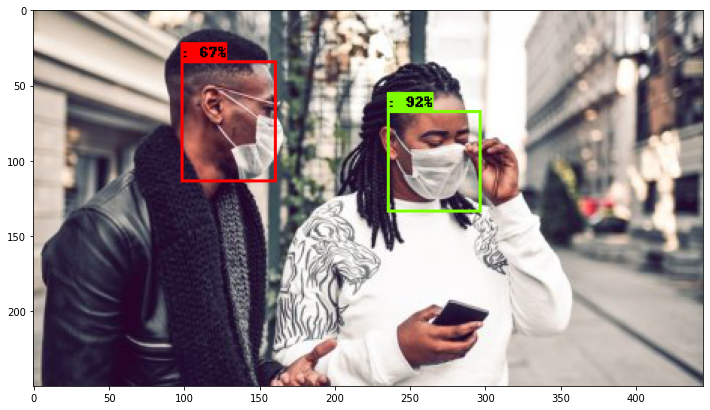

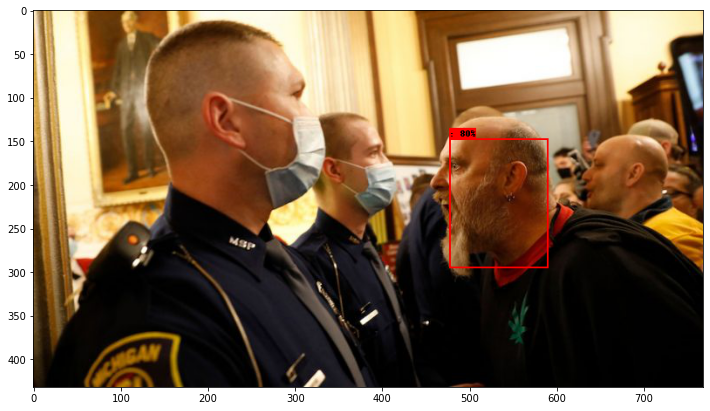

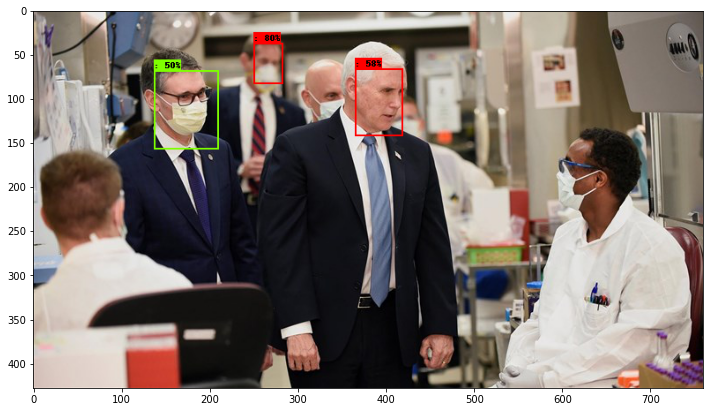

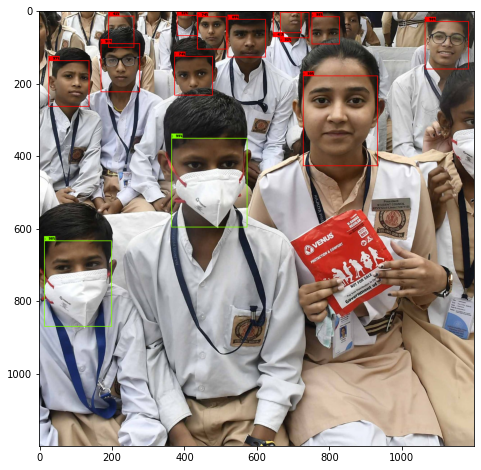

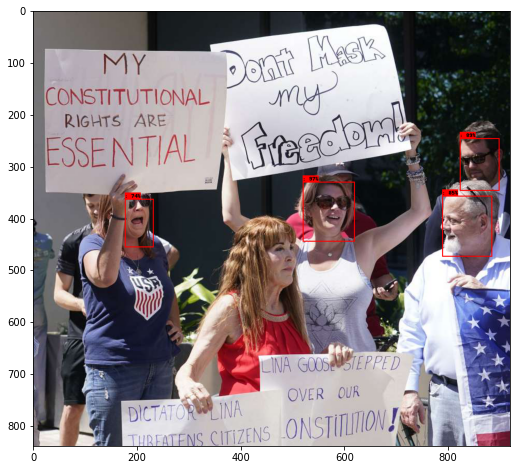

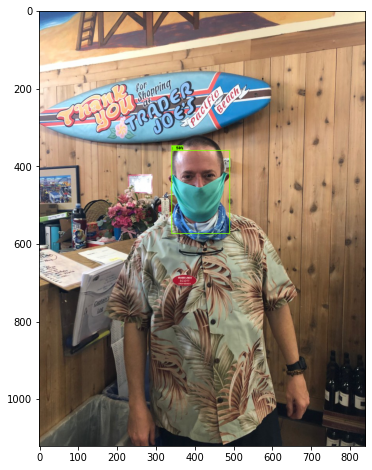

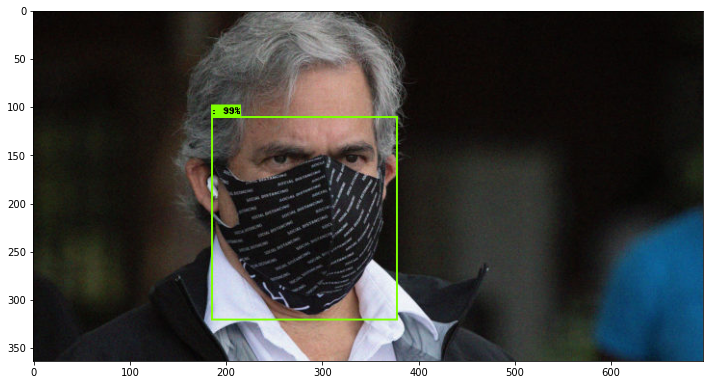

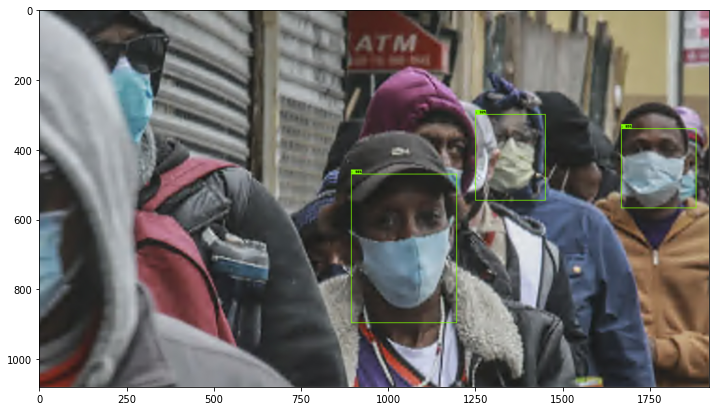

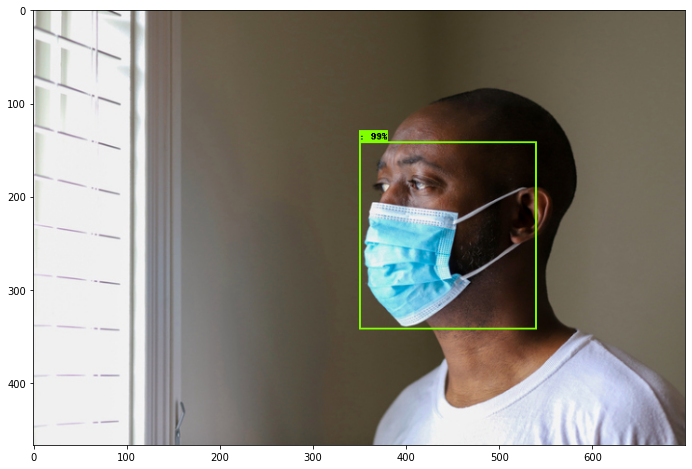

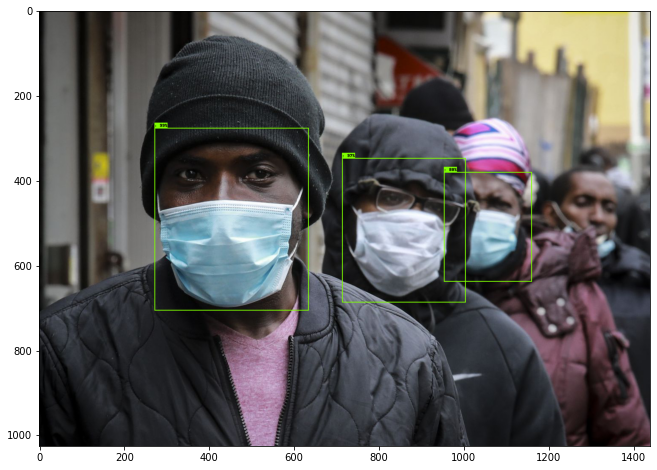

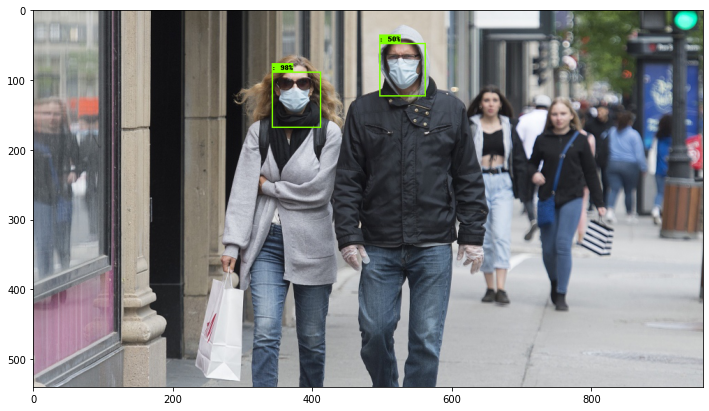

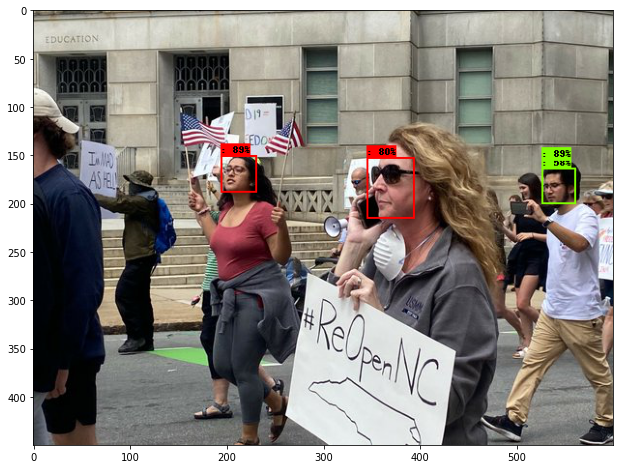

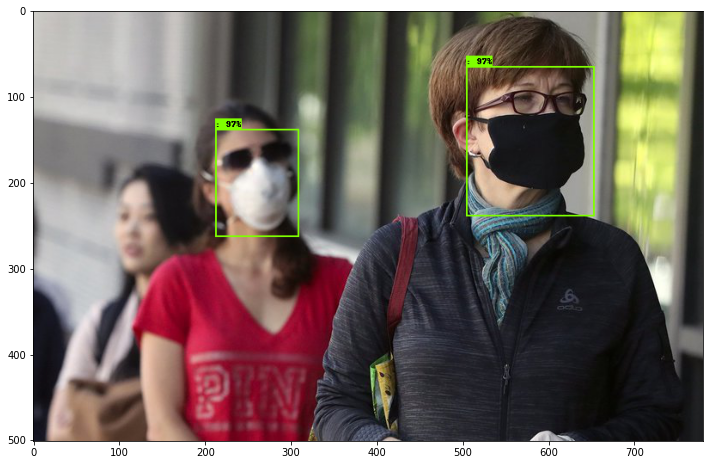

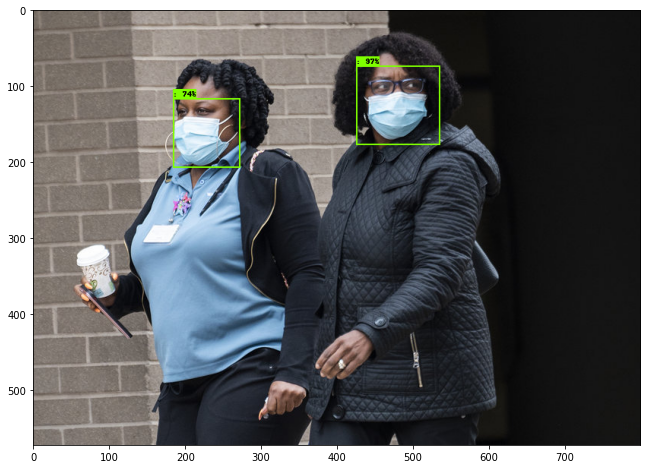

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)

  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)

  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)

  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)

  print(image_path)


  # Visualization of the results of a detection.
  visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      line_thickness=2,
      min_score_thresh=0.30)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)




---

# Running your model on the Raspberry Pi

### 1. CREATE tflite_graph.pb file from your last saved checkpoint

First you will need to create the .pb file setup for tflite (step 1) and then convert that file to a .tflite (step 2).  If you are also using the Google Coral TPU you will also have to use the EdgeTPU compiler to convert your detect.tflite to the  detect_edgetpu.tflite file (step 3 - NOT REQUIRED)

First, create the folder:

In [ ]:
%cd /content/tensorflow1/models/research/object_detection/

/content/tensorflow1/models/research/object_detection


In [ ]:
# Create TFLite_model folder
!mkdir TFLite_model
#!mkdir inference_graph

Code below will make the tflite_graph.pb file using the latest checkpoint (set trained_checkpoint_prefix based on the latest file in the training folder).  Make sure you look in the training folder for the checkpoint with the largest number and replace the "model.ckpt-**13144**" with the number from your latest checkpoint like this "model.ckpt-{YOUR NUMBER VALUE}".  When you have done that then run the code.

The parameter you will need to adjust in the command below looks like this:

`--trained_checkpoint_prefix=/content/tensorflow1/models/research/object_detection/training/model.ckpt-13144`

but the 13144 number will need to be from the files in your /training directory

In [ ]:
# Freeze the TFLite inference graph for using on a RPI
# Change ????? to your checkpoint of choice (probably the largest one that was created after you stopped the training process)
!python export_tflite_ssd_graph.py --pipeline_config_path=/content/tensorflow1/models/research/object_detection/training/ssd_mobilenet_v2_quantized_300x300_coco.config --trained_checkpoint_prefix=/content/tensorflow1/models/research/object_detection/training/model.ckpt-13144 --output_directory=/content/tensorflow1/models/research/object_detection/TFLite_model --add_postprocessing_op=true

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## 2. Use TOCO to convert .pb file to TFLite to be used on the Raspberry Pi
this detect.tflite can be used on the RPI since it has been converted to TFLite format and can be then run on the lower powered machines like the Raspberry Pi


this can be used on the RPI without using the Google Coral TPU (but only at ~4fps)

In [ ]:
# CONVERT USING TOCO
!rm ./TFLite_model/detect.tflite
!toco --graph_def_file=/content/tensorflow1/models/research/object_detection/TFLite_model/tflite_graph.pb --output_file=/content/tensorflow1/models/research/object_detection/TFLite_model/detect.tflite --input_arrays=normalized_input_image_tensor --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 --inference_type=QUANTIZED_UINT8 --mean_values=128 --std_dev_values=128 --change_concat_input_ranges=false --allow_custom_ops --input_shapes=1,300,300,3 --enable_v1_converter

rm: cannot remove './TFLite_model/detect.tflite': No such file or directory
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/ten

## 3. Convert TFLite file so run at higher speeds using the Google Coral TPU (NOT REQUIRED)
The normal detect.tflite file will run on the Raspberry Pi but only at around 4FPS.  If you need higher speeds you will need to use a Google Coral TPU available here:   
https://amzn.to/2BSzANN

as well as converting the tflite to use the Edge TPU services with the EdgeTPU compiler.  This change will get speeds of around 20-30FPS depending on what you are also doing in the code.

My example video using the Google Coral TPU with the Raspberry Pi is here:  
https://www.youtube.com/watch?v=34NSZA2Ne5A


Install the compiler:

In [ ]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

!sudo apt-get update

!sudo apt-get install edgetpu-compiler

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  28391      0 --:--:-- --:--:-- --:--:-- 29681
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.lau

Move to the TFLite folder and run the compiler (creates a detect_edgetpu.tflite file):

In [ ]:
%cd /content/tensorflow1/models/research/object_detection/TFLite_model/

!edgetpu_compiler detect.tflite

/content/tensorflow1/models/research/object_detection/TFLite_model
Edge TPU Compiler version 14.1.317412892

Model compiled successfully in 607 ms.

Input model: detect.tflite
Input size: 4.51MiB
Output model: detect_edgetpu.tflite
Output size: 5.15MiB
On-chip memory used for caching model parameters: 5.05MiB
On-chip memory remaining for caching model parameters: 2.69MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 99
Operation log: detect_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 98
Number of operations that will run on CPU: 1
See the operation log file for individual operation details.




---


# Saving models and files created in training

The best way to have some output of the models you are creating is to zip up the folders and either 1) download the zip files or 2) use Google Drive to back up the files to somewhere you can download later.

First lets zip up the TFLite_model folder:

In [ ]:
# Zip the TFLite_Model folder for downloading
%cd /content/tensorflow1/models/research/object_detection

!zip -r 'TFLite_Model081420.zip' TFLite_model

/content/tensorflow1/models/research/object_detection
  adding: TFLite_model/ (stored 0%)
  adding: TFLite_model/detect.tflite (deflated 29%)
  adding: TFLite_model/detect_edgetpu.tflite (deflated 36%)
  adding: TFLite_model/detect_edgetpu.log (deflated 61%)
  adding: TFLite_model/tflite_graph.pbtxt (deflated 56%)
  adding: TFLite_model/tflite_graph.pb (deflated 9%)


Next use the code below to mount Google Drive to your Colab so that you can easily save files there (much faster than downloading from Colab).

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In my Google Drive I have a subfolder called "machine learning" and an SSD_TRAINER folder in that, if you have a different path in yours just change the path after "My Drive" below to match wherever you want to save your files in your Google Drive. 

In [ ]:
!cp  training081420.zip '/content/drive/My Drive/machine_learning/SSD_TRAINER'

In [ ]:
!cp  TFLite_Model081420.zip '/content/drive/My Drive/machine_learning/SSD_TRAINER'

In [ ]:
!cp  inference_graph081420.zip '/content/drive/My Drive/machine_learning/SSD_TRAINER'



---


# Code for keeping Colab running

If you are using Colab you might notice that it deletes your work if it is left sitting (training) with no user interaction.  To get around that I find this little bit of code that will simulate user interaction and maintain the training even as I leave it overnight.  Simply open up your console in developer tools (hit f12) and paste the following into the console window.  It seems to have some slightly weird interaction (a popup from Colab) that comes and goes but it doesnt stop training and works all night. 

```
var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End"); 
    };

    var intervalId = setInterval(clickConnect, 60000);

    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };

    return stopClickConnectHandler;
};

var stopClickConnect = startClickConnect();
```

